<a href="https://colab.research.google.com/github/dmejiaho/TAM-2025-2/blob/main/Proyeccion__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Librerias

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image



##Vectores dos dimensiones

El código calcula la proyección lineal de un vector $\mathbf{v}$ sobre un vector $\mathbf{w}$. Matemáticamente, esto se define como:

$$ \text{proj}_{\mathbf{w}}(\mathbf{v}) = \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{w}\|^2} \mathbf{w} $$

Donde:

$\mathbf{v} \cdot \mathbf{w}$ es el producto punto de $\mathbf{v}$ y $\mathbf{w}$.
$\|\mathbf{w}\|^2$ es la magnitud al cuadrado de $\mathbf{w}$ .
El término $\frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{w}\|^2}$ es un escalar (un número) llamado $\alpha$$\alpha$, que indica cuánto de $\mathbf{v}$ está en la dirección de $\mathbf{w}$.

In [63]:
def proyeccion_lineal(v, w):
  """
  Calcula la proyección lineal del vector v sobre el vector w.

  Args:
    v: El vector a proyectar (array de NumPy).
    w: El vector sobre el que se proyecta (array de NumPy).

  Returns:
    El vector proyectado de v sobre w (array de NumPy).
  """
  # Calcular el coeficiente de proyección (alpha)
  alpha = np.dot(v, w) / np.dot(w, w)

  # Calcular el vector proyectado
  v_proyectado = alpha * w

  return v_proyectado

# Definir dos vectores en 2D
v = np.array([2, 4])
w = np.array([5, 1])

# Calcular la proyección lineal de v sobre w
v_proyectado = proyeccion_lineal(v, w)

print(f"Vector v: {v}")
print(f"Vector w: {w}")
print(f"Proyección de v sobre w: {v_proyectado}")

Vector v: [2 4]
Vector w: [5 1]
Proyección de v sobre w: [2.69230769 0.53846154]


Este código utiliza la librería matplotlib para visualizar los vectores $\mathbf{v}$, $\mathbf{w}$ y la proyección de $\mathbf{v}$ sobre $\mathbf{w}$ en un plano 2D.

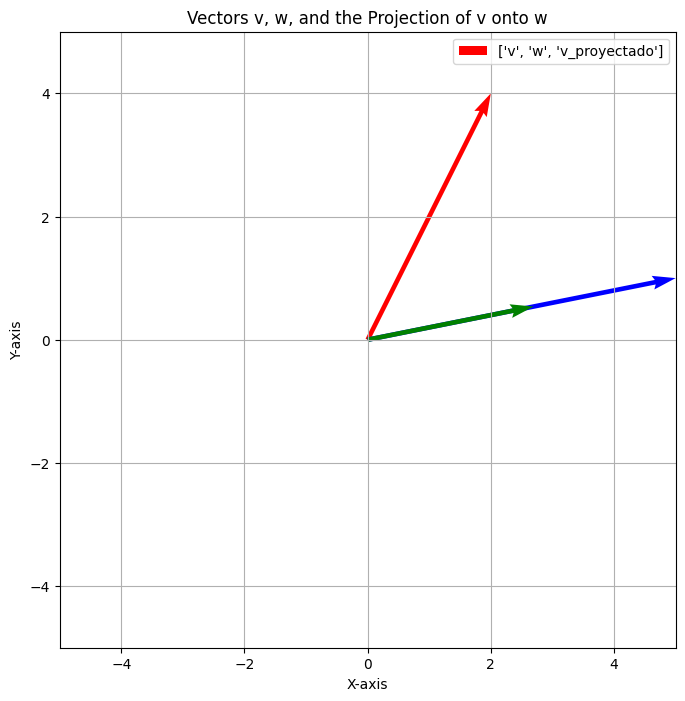

In [64]:
# Plot the vectors
plt.figure(figsize=(8, 8))
origin = np.array([[0, 0, 0], [0, 0, 0]]) # origin point for the arrows for each vector

# Add the projected vector to the quiver plot
plt.quiver(*origin, [v[0], w[0], v_proyectado[0]], [v[1], w[1], v_proyectado[1]], color=['r', 'b', 'g'], scale=1, angles='xy', scale_units='xy', label=['v', 'w', 'v_proyectado'])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vectors v, w, and the Projection of v onto w')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Este código calcula el valor de $\alpha$ (el escalar de la proyección) usando la fórmula directa:

$$ \alpha = \frac{\mathbf{v} \cdot \mathbf{w}}{\|\mathbf{w}\|^2} $$
Simplemente divide el producto punto de v y w por el producto punto de w consigo mismo (que es la magnitud de w al cuadrado). Este es el valor exacto de $\alpha$$\alpha$.

In [65]:
# Calculate the analytical value of alpha
alpha_analytical = np.dot(v, w) / np.dot(w, w)

# Print the analytical value of alpha
print(f"Analytical value of alpha: {alpha_analytical}")

Analytical value of alpha: 0.5384615384615384


Este código encuentra el valor de $\alpha$ que minimiza el error entre el vector original $\mathbf{v}$ y su aproximación $\alpha \mathbf{w}$ (la proyección). Lo hace usando descenso de gradiente:

loss_function(alpha, v, w): Define la función de pérdida (error al cuadrado) que queremos minimizar: $L(\alpha) = \|\mathbf{v} - \alpha \mathbf{w}\|^2$.

gradient(alpha, v, w): Calcula el gradiente de la función de pérdida con respecto a $\alpha$, que nos dice en qué dirección debemos ajustar $\alpha$ para reducir la pérdida.
Bucle de Descenso de Gradiente:


Comienza con un valor inicial de $\alpha$.
En cada iteración, calcula el gradiente en el valor actual de $\alpha$.
Actualiza $\alpha$ moviéndose un pequeño paso (learning_rate) en la dirección opuesta al gradiente para disminuir la pérdida.

Repite el proceso hasta que $\alpha$ converja al valor que minimiza la pérdida, que es el mismo valor que calculamos analíticamente antes.
En esencia, el código "aprende" el mejor $\alpha$ ajustándolo iterativamente para reducir el error, similar a cómo entrenas un modelo simple en Machine Learning.

In [66]:
# Define the loss function (Mean Squared Error)
def loss_function(alpha, v, w):
  """Calculates the squared error between v and alpha * w."""
  v_predicted = alpha * w
  error = v - v_predicted
  return np.sum(error**2)

# Define the gradient of the loss function with respect to alpha
def gradient(alpha, v, w):
  """Calculates the gradient of the loss function with respect to alpha."""
  v_predicted = alpha * w
  error = v - v_predicted
  # The gradient of sum((v - alpha*w)^2) with respect to alpha is -2 * sum((v - alpha*w) * w)
  return -2 * np.dot(error, w)

# Initialize alpha iteratively
alpha_iterative = 0.0

# Set hyperparameters for gradient descent
learning_rate = 0.01
n_iterations = 1000

# Store loss values at each iteration
loss_history = []

# Gradient descent loop
for i in range(n_iterations):
  # Calculate the current loss
  current_loss = loss_function(alpha_iterative, v, w)
  loss_history.append(current_loss)

  # Calculate the gradient
  grad = gradient(alpha_iterative, v, w)

  # Update alpha
  alpha_iterative = alpha_iterative - learning_rate * grad

# Store the final iterative value of alpha
final_alpha_iterative = alpha_iterative

print(f"Initial iterative alpha: {0.0}")
print(f"Final iterative alpha after {n_iterations} iterations: {final_alpha_iterative}")
print(f"Analytical alpha: {alpha_analytical}")

Initial iterative alpha: 0.0
Final iterative alpha after 1000 iterations: 0.5384615384615384
Analytical alpha: 0.5384615384615384


Queremos minimizar la función de pérdida:

$$
L(\alpha) = \| v - \alpha w \|^2
$$

La derivada es:

$$
\nabla L(\alpha) = -2 \, w^T (v - \alpha w)
$$

El descenso de gradiente actualiza:

$$
\alpha_{k+1} = \alpha_k - \eta \, \nabla L(\alpha_k)
$$


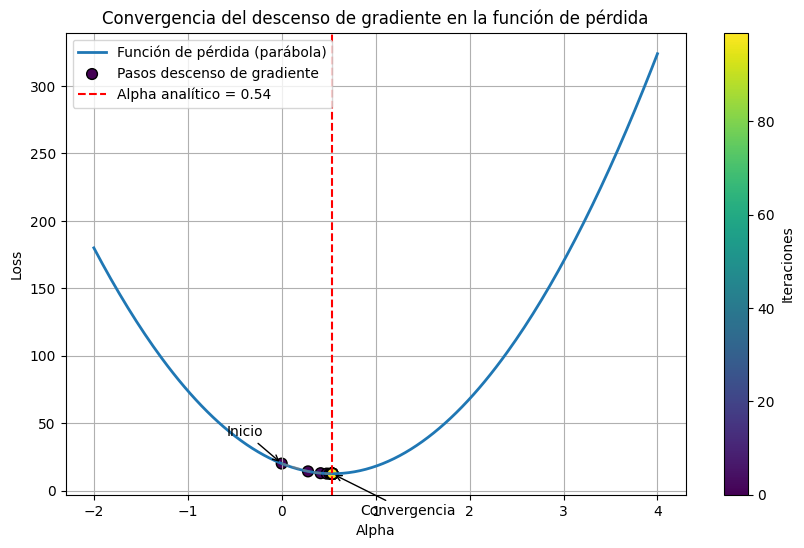

In [67]:
# Guardamos también los alphas en cada iteración para la gráfica
alpha_iterative = 0.0
learning_rate = 0.01
n_iterations = 100
alpha_history = []
loss_history = []

for i in range(n_iterations):
    alpha_history.append(alpha_iterative)
    current_loss = loss_function(alpha_iterative, v, w)
    loss_history.append(current_loss)

    grad = gradient(alpha_iterative, v, w)
    alpha_iterative = alpha_iterative - learning_rate * grad

# ===================== Gráfica mejorada ===================== #
alpha_values = np.linspace(-2, 4, 200)
loss_values = [loss_function(alpha, v, w) for alpha in alpha_values]

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, loss_values, label='Función de pérdida (parábola)', linewidth=2)

# Colorear los pasos del gradiente con degradado
points = plt.scatter(alpha_history, loss_history,
                     c=np.arange(len(alpha_history)), cmap='viridis',
                     edgecolors='k', s=60, label='Pasos descenso de gradiente')

plt.plot(alpha_history, loss_history, '--', color='gray', alpha=0.6)

# Línea vertical en el valor analítico
plt.axvline(x=alpha_analytical, color='r', linestyle='--',
            label=f'Alpha analítico = {alpha_analytical:.2f}')

# Anotaciones inicio y fin
plt.annotate("Inicio", (alpha_history[0], loss_history[0]),
             xytext=(-40, 20), textcoords="offset points",
             arrowprops=dict(arrowstyle="->"))
plt.annotate("Convergencia", (alpha_history[-1], loss_history[-1]),
             xytext=(20, -30), textcoords="offset points",
             arrowprops=dict(arrowstyle="->"))

plt.xlabel("Alpha")
plt.ylabel("Loss")
plt.title("Convergencia del descenso de gradiente en la función de pérdida")
plt.colorbar(points, label="Iteraciones")
plt.legend()
plt.grid(True)
plt.show()


El valor óptimo de $\alpha$ se puede calcular de dos formas:

- **Analítico**: usando la fórmula cerrada  
$$
\alpha^* = \frac{w^T v}{w^T w}
$$  

- **Iterativo**: aplicando descenso de gradiente hasta la convergencia.

En el código se imprimen ambos valores y se compara su cercanía.  
Si la diferencia es muy pequeña, significa que el descenso de gradiente logró aproximar correctamente la solución exacta.

In [68]:
# Print the analytical and iterative alpha values
print(f"Analytical alpha value: {alpha_analytical}")
print(f"Iterative alpha value (after {n_iterations} iterations): {final_alpha_iterative}")

# Briefly comment on the closeness of the two values
if abs(alpha_analytical - final_alpha_iterative) < 1e-6:
  print("The iterative alpha value is very close to the analytical value, indicating successful convergence of gradient descent.")
else:
  print("The iterative alpha value is not very close to the analytical value, suggesting potential issues with gradient descent (e.g., learning rate, number of iterations).")

Analytical alpha value: 0.5384615384615384
Iterative alpha value (after 100 iterations): 0.5384615384615384
The iterative alpha value is very close to the analytical value, indicating successful convergence of gradient descent.


El valor óptimo de $\alpha$ se puede calcular de dos formas:

- **Analítico** (fórmula cerrada):

$$
\alpha^* = \frac{w^T v}{w^T w}
$$

- **Iterativo** (descenso de gradiente):

$$
\alpha_{k+1} = \alpha_k - \eta \, \nabla L(\alpha_k),
\quad \text{donde} \quad
\nabla L(\alpha) = -2 w^T (v - \alpha w)
$$

---

###  Observación de los resultados
En la ejecución, ambos valores coinciden:

- $\alpha_{analítico} \approx \alpha_{iterativo}$  

Esto indica que el **descenso de gradiente converge correctamente** al mismo mínimo que la solución analítica.  
El resultado valida que tanto la deducción matemática como la implementación son consistentes.

##Imagenes

1. Se descargan dos imágenes desde internet y se guardan localmente.  
2. Cada imagen se convierte a **escala de grises** y se redimensiona a $64 \times 64$ píxeles.  
3. La imagen se transforma en un **vector 1D** normalizado en $[0,1]$.  
   - Si la imagen tiene tamaño $64 \times 64$, el vector resultante es de dimensión $4096$.  

---

###  Representación matemática
Una imagen en escala de grises se modela como una matriz:

$$
I = \{ I_{ij} \} \quad \text{con} \quad I_{ij} \in [0,1]
$$

Luego se convierte en un vector columna:

$$
v = \text{vec}(I) \in \mathbb{R}^{4096}
$$

De esta forma, podemos operar con imágenes como **vectores en un espacio de alta dimensión**.


Dimensión vector v: (4096,)
Dimensión vector w: (4096,)


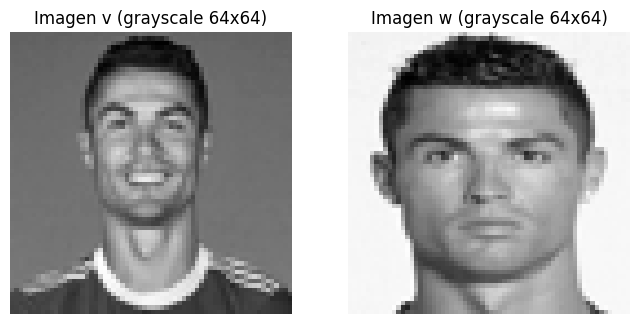

In [69]:
# ====== Función para descargar imágenes ======
def download_image(url, filename):
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
        return filename
    else:
        raise Exception(f"No se pudo descargar la imagen: {url}")

# ====== Links de imágenes ======
url_main = "https://www.clarin.com/img/2021/09/09/-XSm8HJjP_340x340__1.jpg"
url_same = "https://i.pinimg.com/736x/fd/7e/ac/fd7eac51d4a09870d23e33ff95fa6418.jpg"

# Descargar imágenes
img_main = download_image(url_main, "main.jpg")
img_same = download_image(url_same, "same.jpg")

# ====== Conversión a vectores ======
def image_to_vector(path, size=(64, 64)):
    """Convierte imagen a escala de grises y vector 1D"""
    img = Image.open(path).convert("L")   # escala de grises
    img = img.resize(size)                # redimensionar
    arr = np.array(img, dtype=np.float32) / 255.0  # normalizar [0,1]
    return arr.flatten(), arr             # vector y matriz

# Convertir imágenes
v, v_matrix = image_to_vector(img_main)
w, w_matrix = image_to_vector(img_same)

# ====== Mostrar resultados ======
print(f"Dimensión vector v: {v.shape}")
print(f"Dimensión vector w: {w.shape}")

# Mostrar imágenes originales redimensionadas
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(v_matrix, cmap="gray")
plt.title("Imagen v (grayscale 64x64)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(w_matrix, cmap="gray")
plt.title("Imagen w (grayscale 64x64)")
plt.axis("off")
plt.show()



La **función de pérdida** mide la distancia entre el vector $v$ y la proyección de $w$:

$$
L(\alpha) = \| v - \alpha w \|^2
$$

Para encontrar el $\alpha$ óptimo, derivamos e igualamos a cero:

$$
\frac{dL}{d\alpha} = -2 w^T (v - \alpha w) = 0
$$

De donde:

$$
\alpha^* = \frac{w^T v}{w^T w}
$$

---

### En el código:
1. Se calcula el producto punto $w^T v$ y $w^T w$.  
2. Con eso se obtiene $\alpha^*$.  
3. Se grafica la parábola $L(\alpha)$ y se marca el mínimo en rojo.  

El punto rojo representa la **proyección analítica exacta** donde la pérdida es mínima.


Alpha óptimo (analítico): 0.7122609
Pérdida mínima (analítica): 202.52234


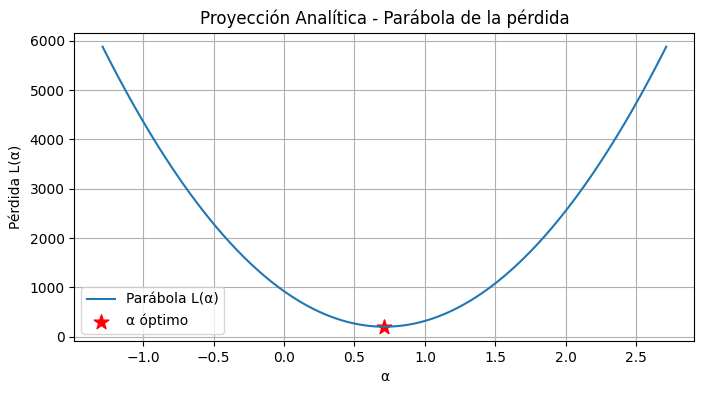

In [70]:
# ====== PROYECCIÓN ESCALAR (ANALÍTICO) ======
# Calculamos el alpha óptimo con derivada
dot_vw = np.dot(v, w)
dot_ww = np.dot(w, w)

alpha_opt = dot_vw / dot_ww
loss_opt = np.linalg.norm(v - alpha_opt * w)**2

print("Alpha óptimo (analítico):", alpha_opt)
print("Pérdida mínima (analítica):", loss_opt)

# ====== Graficar parábola ======
alpha_vals = np.linspace(alpha_opt - 2, alpha_opt + 2, 500)
loss_vals = [np.linalg.norm(v - a * w)**2 for a in alpha_vals]

plt.figure(figsize=(8,4))
plt.plot(alpha_vals, loss_vals, label="Parábola L(α)")
plt.scatter([alpha_opt], [loss_opt], color="red", marker="*", s=120, label="α óptimo")
plt.xlabel("α")
plt.ylabel("Pérdida L(α)")
plt.title("Proyección Analítica - Parábola de la pérdida")
plt.legend()
plt.grid(True)
plt.show()


En este bloque se compara el cálculo del valor óptimo de $\alpha$ por dos métodos:

- **Analítico:**  
  A partir de la derivada de la función de pérdida
  $$
  L(\alpha) = \|v - \alpha w\|^2
  $$
  se obtiene la solución cerrada:
  $$
  \alpha^* = \frac{v^T w}{w^T w}
  $$

- **Iterativo (Gradiente Descendente):**  
  Partiendo de un valor inicial, $\alpha$ se actualiza siguiendo el gradiente:
  $$
  \alpha_{k+1} = \alpha_k - \eta \, \nabla L(\alpha_k),
  \quad \text{donde} \quad
  \nabla L(\alpha) = 2 (w^T w)\alpha - 2 (v^T w)
  $$
  Con una tasa de aprendizaje adecuada, las iteraciones convergen hacia el mismo mínimo $\alpha^*$.

---

 **Gráficas generadas:**
1. La parábola $L(\alpha)$ con el mínimo analítico marcado.  
2. La trayectoria de las iteraciones del gradiente descendente.  
3. Un zoom alrededor del mínimo.  
4. La convergencia de $\alpha$ a lo largo de las iteraciones.

lr usado = 1.763e-04, alpha_final_iter = 7.122608e-01, loss_final_iter = 2.025223e+02


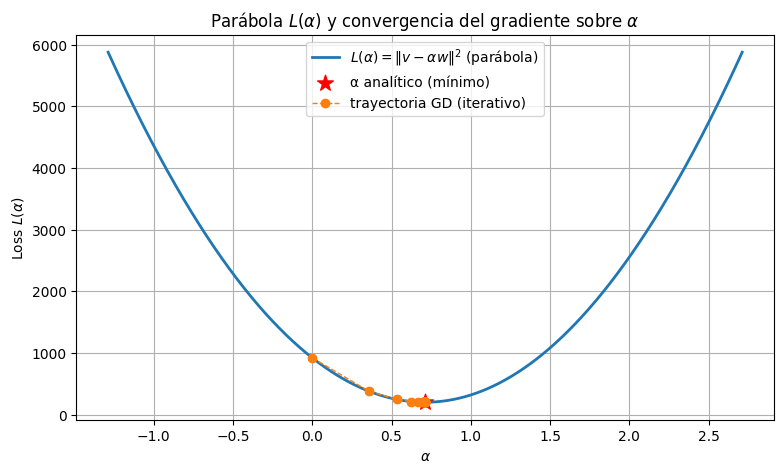

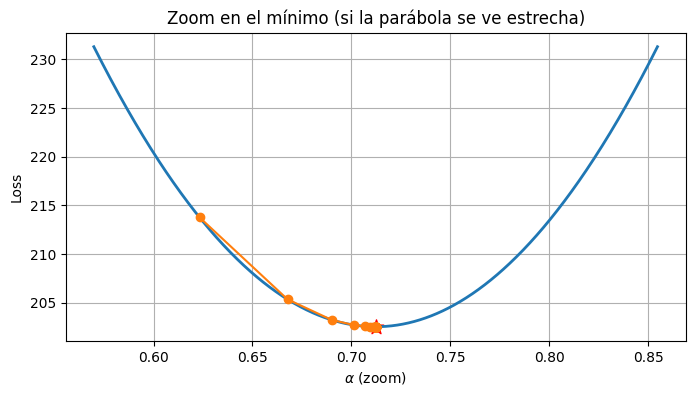

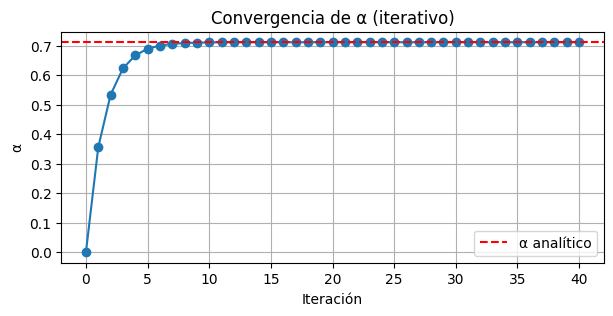

In [71]:
span = max(1.0, abs(alpha_opt), 0.5)
alpha_min = alpha_opt - 2 * span
alpha_max = alpha_opt + 2 * span
alpha_vals = np.linspace(alpha_min, alpha_max, 2000)
loss_vals = np.array([np.linalg.norm(v - a * w)**2 for a in alpha_vals])

# ==== gradiente descendente sobre alpha (iterativo) ====
a = dot_ww       # coef cuadrático
b = dot_vw       # término lineal (v^T w)

def gradiente_alpha(v, w, alpha_init=0.0, lr=None, epochs=40):
    if lr is None:
        lr = 1.0 / (4.0 * a)   # paso seguro por defecto; si quieres: 1/(2a) da solución en 1 paso
    alpha = alpha_init
    alphas = [alpha]
    losses = [np.linalg.norm(v - alpha * w)**2]
    for _ in range(epochs):
        grad = 2 * a * alpha - 2 * b          # dL/dalpha
        alpha = alpha - lr * grad
        alphas.append(alpha)
        losses.append(np.linalg.norm(v - alpha * w)**2)
    return np.array(alphas), np.array(losses), lr

# Ejecución con lr por defecto (seguro)
alphas, losses_iter, lr_used = gradiente_alpha(v, w, alpha_init=0.0, lr=None, epochs=40)
print(f"lr usado = {lr_used:.3e}, alpha_final_iter = {alphas[-1]:.6e}, loss_final_iter = {losses_iter[-1]:.6e}")

# ==== Plots ====
plt.figure(figsize=(9,5))
plt.plot(alpha_vals, loss_vals, label=r"$L(\alpha)=\|v-\alpha w\|^2$ (parábola)", linewidth=2)
plt.scatter([alpha_opt], [loss_opt], color='red', marker='*', s=140, label='α analítico (mínimo)')
plt.plot(alphas, losses_iter, marker='o', linestyle='--', label='trayectoria GD (iterativo)', linewidth=1)
plt.scatter(alphas, losses_iter, s=30)
plt.xlabel(r'$\alpha$')
plt.ylabel('Loss $L(\\alpha)$')
plt.title('Parábola $L(\\alpha)$ y convergencia del gradiente sobre $\\alpha$')
plt.legend()
plt.grid(True)
plt.show()

# ==== Zoom alrededor del mínimo (por si la parábola se ve "muy fina") ====
zoom_span = max(0.1, abs(alpha_opt) * 0.2, 1e-3)
alpha_vals_zoom = np.linspace(alpha_opt - zoom_span, alpha_opt + zoom_span, 1000)
loss_vals_zoom = np.array([np.linalg.norm(v - a * w)**2 for a in alpha_vals_zoom])

plt.figure(figsize=(8,4))
plt.plot(alpha_vals_zoom, loss_vals_zoom, linewidth=2)
plt.scatter([alpha_opt], [loss_opt], color='red', marker='*', s=120)
# marcar iteraciones que caen en el zoom (si las hay)
mask = (alphas >= alpha_opt - zoom_span) & (alphas <= alpha_opt + zoom_span)
if mask.any():
    plt.plot(alphas[mask], losses_iter[mask], 'o-', label='Iteraciones (zoom)')
plt.xlabel(r'$\alpha$ (zoom)')
plt.ylabel('Loss')
plt.title('Zoom en el mínimo (si la parábola se ve estrecha)')
plt.grid(True)
plt.show()

# ==== α por iteración (convergencia en x) ====
plt.figure(figsize=(7,3))
plt.plot(range(len(alphas)), alphas, 'o-')
plt.axhline(alpha_opt, color='red', linestyle='--', label='α analítico')
plt.xlabel('Iteración')
plt.ylabel('α')
plt.title('Convergencia de α (iterativo)')
plt.legend()
plt.grid(True)
plt.show()

En las gráficas se observa lo siguiente:

1. **Zoom en el mínimo:**  
   La parábola de la función de pérdida $L(\alpha)$ muestra cómo el descenso de gradiente (línea naranja con puntos) va acercándose al mínimo.  
   El valor final converge muy cerca del $\alpha$ óptimo obtenido de forma analítica.

2. **Convergencia de $\alpha$:**  
   La evolución de $\alpha$ a lo largo de las iteraciones (puntos azules) se aproxima rápidamente a la línea roja discontinua, que representa el valor analítico $\alpha^*$.  
   Esto confirma que el algoritmo iterativo alcanza la misma solución que la fórmula cerrada.

---

**Conclusión:**  
El gradiente descendente converge exitosamente al valor analítico, validando la consistencia entre el método iterativo y el resultado matemático exacto.